In [2]:
!pip install pandas numpy scikit-learn keras xgboost yfinance


  Using cached xgboost-2.1.3-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.



     -------------------------------------- 948.2/948.2 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 124.9/124.9 MB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 3.8/3.8 MB 717.7 kB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139012 sha256=7d6c33b73307883735e41ee4256154d4a481be11d86f789b89826aaf9e3edeff
  Stored in directory: c:\users\bheema raju\appdata\local\pip\cache\wheels\06\b3\7f\ed42a7c83ad89f578928833f5789212c694a015b8bd6a407a1
Successfully built peewee
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successf

conda-repo-cli 1.0.4 requires pathlib, which is not installed.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
ultralytics 8.0.227 requires opencv-python>=4.6.0, which is not installed.
yolov5 7.0.12 requires opencv-python>=4.1.1, which is not installed.


In [13]:
# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import xgboost as xgb

# Fetch historical stock data
def fetch_data(stock_ticker, start_date, end_date):
    data = yf.download(stock_ticker, start=start_date, end=end_date)
    return data

# Preprocess data
def preprocess_data(data):
    data = data[['Close']]
    data['Lag1'] = data['Close'].shift(1)  # Previous day closing price
    data.dropna(inplace=True)  # Drop rows with NaN values
    return data

# Load and preprocess data
data = fetch_data('AAPL', '2020-01-01', '2024-01-01')
data = preprocess_data(data)

# Features and target variable
X = data[['Lag1']].values
y = data['Close'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[*********************100%***********************]  1 of 1 completed
C:\Users\BHEEMA RAJU\AppData\Local\Temp\ipykernel_28764\3165488464.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Lag1'] = data['Close'].shift(1)  # Previous day closing price
C:\Users\BHEEMA RAJU\AppData\Local\Temp\ipykernel_28764\3165488464.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)  # Drop rows with NaN values


In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_lr = model.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")


Linear Regression MSE: 6.969380621285563


In [16]:
# Initialize the model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Train the model
xg_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xg_model.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb}")


XGBoost MSE: 8.767889401360835


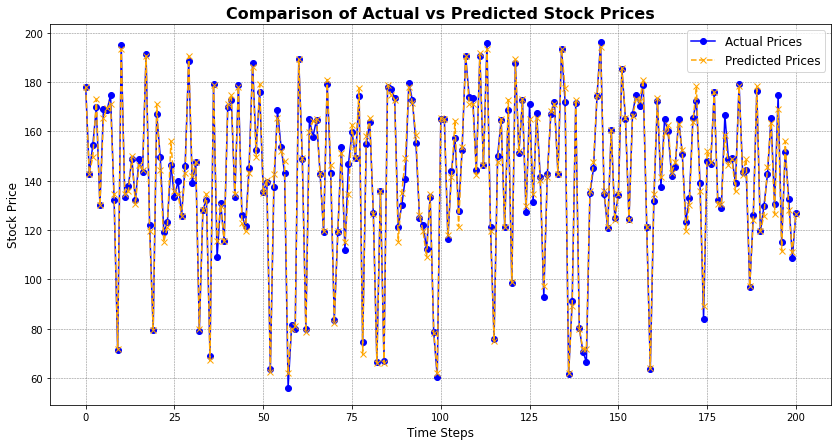

In [26]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Actual vs Predicted visualization
plt.figure(figsize=(14, 7))
x_axis = np.arange(len(y_test))

# Plot actual prices
plt.plot(x_axis, y_test, color='blue', marker='o', label='Actual Prices')

# Plot predicted prices
plt.plot(x_axis, y_pred_xgb, color='orange', linestyle='--', marker='x', label='Predicted Prices')

# Add title, labels, and legend
plt.title('Comparison of Actual vs Predicted Stock Prices', fontsize=16, fontweight='bold')
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()
